# Introduction to Machine Learning Algorithms: Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. In statistics, the coefficient that shows the degree of the relationship between the variables is called the correlation, and the equation that determines the functional form of the relationship between the variables is called the regression equation.

A dependent variable and one or more independent variables are included in the mathematical model established while performing the regression analysis. If the number of independent variables is one, a simple linear regression model is established, and if there is more than one independent variable, a multiple regression model is established.

In this equation, the 𝑌 variable represents the target variable and the 𝑋 variables represent the feature variables. The coefficients of 𝛽 coefficients are recorded as coef_ in sklearn and 𝛽0 as intercept_. In linear regression analysis, if we work in a 2-dimensional plane, that is, if we have an output and a feature variable, we try to draw the best line representing the 2 variables.

Linear Regression: Functional form of the relationship between a dependent variable (𝑌) and a series of independent variables (𝑋). Linear regression analysis: «the study of fitting data to a linear line» or «linear modeling»

* 𝑌: Output, dependent, result, affected variable
* 𝑋: Input, independent, cause(factor), influencing variable

Regression question: How can we predict the X-dependent conditions of Y?

# Error Evaluation for Regression Models

Tasks Employees' years of experience and salary information are given.

1. Create the linear regression model equation according to the given bias and weight. Bias = 275, Weight= 90 (y' = b+wx)
2. Estimate the salary for all years of experience in the table according to the model equation you have created.
3. Calculate MSE, RMSE, and MAE scores to measure the success of the model.

Year of experience is the independent variable (x), and Salary is the dependent variable (y).
In other words; The work experience of the employee generally affects the salary, and this effect is positive.
In the simple regression model, we will establish, we will examine this relationship between years of experience and salary.

**Loading required Python packages**

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import Warnings
import warnings
warnings.simplefilter(action="ignore")

# Setting Configurations:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# for data splitting, transforming and model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

The linear regression function is called with the line from sklearn.linear_model import LinearRegression.

* **statsmodels** — a module that provides classes and functions for the estimation of many different statistical models,as well as for conducting statistical tests, and statistical data exploration.
* **scikit-learn** — a module that provides simple and efficient tools for data mining and data analysis.

In [2]:
# Create the arrays that represent the values of the x and y axis:
experience = np.array([5, 7, 3, 3, 2, 7, 3, 10, 6, 4, 8, 1, 1, 9, 1])
salary = np.array([600, 900, 550, 500, 400, 950, 540, 1200, 900, 550, 1100, 460, 400, 1000, 380])

In [3]:
# Create pandas dataframe to store our X and y values
df = pd.DataFrame({'X': experience, 'y': salary})
df.head()

,X,y
0,5,600
1,7,900
2,3,550
3,3,500
4,2,400


In [4]:
df.shape

(15, 2)

In [5]:
print(df.corr())

     X    y
X 1.00 0.97
y 0.97 1.00


In [6]:
# Now let's look at the descriptive statistics about the data set.
print(df.describe())

          X       y
count 15.00   15.00
mean   4.67  695.33
std    3.02  280.66
min    1.00  380.00
25%    2.50  480.00
50%    4.00  550.00
75%    7.00  925.00
max   10.00 1200.00


**Visualizing the set results**

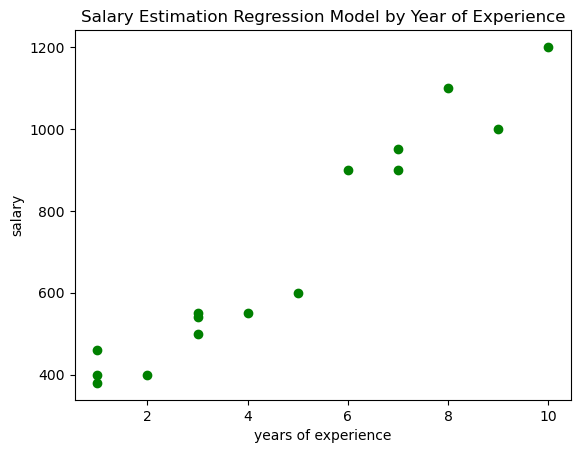

In [7]:
# drawing scatter plot:
plt.scatter(experience, salary, color ="green")
plt.title('Salary Estimation Regression Model by Year of Experience')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

*The graph shows that there is a positive linear relationship between x and y.*

In [8]:
experience = experience.reshape(-1, 1)

**It’s time to start using the model. First, you need to call .fit() on model:**

In [9]:
linear_model = LinearRegression()
linear_model.fit(X=experience, y=salary)

LinearRegression()

In [10]:
linear_model.coef_

array([90.20942408])

In [11]:
linear_model.intercept_

274.3560209424085

In [12]:
linear_model.score(X=experience, y=salary)

0.9396360551357491

*Our model reveals about 94% of data.*

**1.** Create the linear regression model equation according to the given bias and weight. 
* Bias = 275, Weight= 90 (y' = b+wx)

In [13]:
# y’ = 275 + 90*x
Y = [275] + [90] * experience

**2.** Estimate the salary for all years of experience in the table according to the model equation you have created.

In [14]:
linear_model.predict(experience)

array([ 725.40314136,  905.82198953,  544.98429319,  544.98429319,
        454.77486911,  905.82198953,  544.98429319, 1176.45026178,
        815.61256545,  635.19371728,  996.03141361,  364.56544503,
        364.56544503, 1086.2408377 ,  364.56544503])

In [15]:
y_predict = linear_model.predict(experience)


In [17]:
y_predict

array([ 725.40314136,  905.82198953,  544.98429319,  544.98429319,
        454.77486911,  905.82198953,  544.98429319, 1176.45026178,
        815.61256545,  635.19371728,  996.03141361,  364.56544503,
        364.56544503, 1086.2408377 ,  364.56544503])

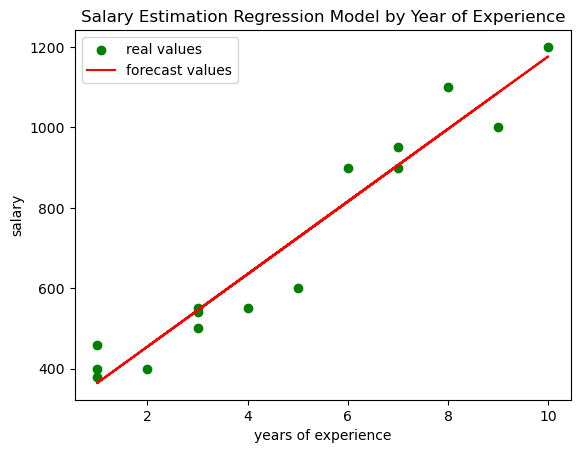

In [16]:
plt.scatter(experience, salary, color ="green", label = 'real values')
plt.plot(experience, y_predict, color = 'red', label = 'forecast values')
plt.legend()
plt.title('Salary Estimation Regression Model by Year of Experience')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

# Regression model evaluation metrics

The MSE, MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

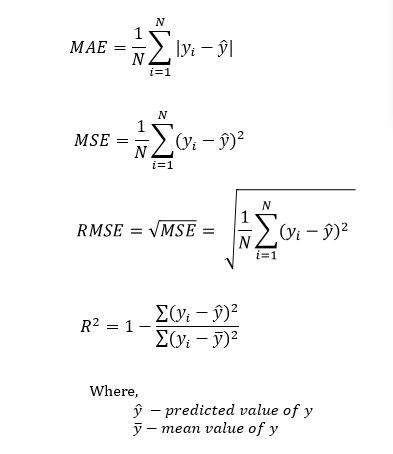

**3.** Calculate MSE, RMSE, and MAE scores to measure the success of the model.

In [18]:
mse = mean_squared_error(salary, y_predict)          
mae = mean_absolute_error(salary, y_predict)          
rmse = np.sqrt(mse)
r2score = r2_score (salary, y_predict)

In [19]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'coefficient of determination score : {r2score:.2f}')

Mean absolute error: 54.32
Mean squared error: 4437.85
Root mean squared error: 66.62
coefficient of determination score : 0.94
